In [1]:
# Manipulação dos Dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# BOTAR EM PREÇOS DE 2020

https://www.hfbrasil.org.br/br/banco-de-dados-precos-medios-dos-hortifruticolas.aspx

#### Frutas
- Banana
- Maçã
- Manga
- Melancia
- Uva
       

In [2]:
df_banana = pd.read_excel('precos_banana.xlsx')
df_maca = pd.read_excel('precos_maca.xlsx')
df_manga = pd.read_excel('precos_manga.xlsx')
df_melancia = pd.read_excel('precos_melancia.xlsx')
df_uva = pd.read_excel('precos_uva.xlsx')

In [3]:
df_banana.head(4)

,Produto,Região,Mês,Ano,Moeda,Unidade,Preço
0,Nanica primeira - atacado,São Paulo (capital),1.0,2023.0,R$,caixa de 22 Kg,51.33
1,Prata anã primeira - atacado,São Paulo (capital),1.0,2023.0,R$,Caixa 20 Kg,119.38
2,Prata litoral primeira - atacado,São Paulo (capital),1.0,2023.0,R$,Caixa 20 Kg,89.38
3,Nanica primeira - atacado,São Paulo (capital),12.0,2022.0,R$,caixa de 22 Kg,67.03


In [4]:
df_maca.head(4)

,Produto,Região,Mês,Ano,Moeda,Unidade,Preço
0,Gala graúda Cat 1 - atacado,São Paulo (capital),1.0,2023.0,R$,Caixa de 18 Kg,147.67
1,Fuji graúda Cat 1 - atacado,São Paulo (capital),1.0,2023.0,R$,Caixa de 18 Kg,148.75
2,Fuji miúda Cat 1 - atacado,São Paulo (capital),1.0,2023.0,R$,Caixa de 18 Kg,110.00
3,Gala miúda Cat 1 - atacado,São Paulo (capital),1.0,2023.0,R$,Caixa de 18 Kg,122.67


In [5]:
df_manga.head(4)

,Produto,Região,Mês,Ano,Moeda,Unidade,Preço
0,Palmer - atacado,São Paulo (capital),1.0,2023.0,R$,quilograma,2.92
1,Tommy - atacado,São Paulo (capital),1.0,2023.0,R$,quilograma,2.83
2,Palmer - atacado,São Paulo (capital),12.0,2022.0,R$,quilograma,2.56
3,Tommy - atacado,São Paulo (capital),12.0,2022.0,R$,quilograma,2.78


In [6]:
df_melancia.head(4)

,Produto,Região,Mês,Ano,Moeda,Unidade,Preço
0,Melancia Redonda / Comprida - Média (10-12KG) ...,São Paulo (capital),1.0,2023.0,R$,quilograma,2.22
1,Melancia Redonda/Comprida - Graúda (>12 KG) - ...,São Paulo (capital),1.0,2023.0,R$,quilograma,2.55
2,Melancia Redonda/Comprida - Miúda (7-10 KG) - ...,São Paulo (capital),1.0,2023.0,R$,quilograma,2.08
3,Melancia Redonda / Comprida - Média (10-12KG) ...,São Paulo (capital),12.0,2022.0,R$,quilograma,1.57


In [7]:
def alteracao(df, fruta, variacao_fruta, unidade = False):
    
    # Retirando a última linha que contém a fonte dos dados
    df = df.iloc[:-1, ]
    
    # Retirando colunas Região e Moeda
    df = df.drop(columns = ['Região', 'Moeda'], axis = 1)
    
    # Mantendo apenas um tipo de banana - Prata anã
    df = df[df['Produto'] == variacao_fruta]
    
    # Manter apenas a primeira palavra que denomina a variação da fruta
    df['Produto'] = df['Produto'].apply(lambda x: x.split()[0])
    
    # Inserindo nome da fruta na frente da variação
    if(fruta == df['Produto'].unique()[0]):
        pass
    else:
        df['Produto'] = df['Produto'].apply(lambda x: fruta + ' ' + x)
    
    # Mantendo a unidade em formato numérico e transformando para float
    if (unidade == True) and (df['Unidade'].unique()[0] == 'quilograma'):
        pass
    elif unidade:
        df['Unidade'] = df['Unidade'].str.extract('(\d+)').astype(int)
    else:
        pass
    
    # Obtendo Preco por Quilo
    if df['Unidade'].dtype == int:
        df['Preco/KG'] = round(df['Preço'] / df['Unidade'], 2)
    elif df['Unidade'].unique()[0] == 'quilograma':
        df['Preco/KG'] = df['Preço']
    else:
        raise TypeError('Você esqueceu de passar o parâmetro unidade como True!\
 Passe para que o preço por quilo apareça!')
    

    # Criando coluna de data (mês/ano)
    df['Mês'] = df['Mês'].astype(int).astype(str)
    df['Ano'] = df['Ano'].astype(int).astype(str)
    df['Data'] = df['Ano'] + '-' + df['Mês']
    df['Data'] = pd.to_datetime(df['Data'], format = '%Y-%m').dt.strftime('%Y-%m')
    df = df.sort_values(by = 'Data', ascending = True)
    
    # Deletando colunas que não serão utilizada
    df = df.drop(columns = ['Mês', 'Ano', 'Unidade','Preço'], axis = 1)
    

    return df

In [8]:
df_banana = alteracao(df_banana, 'Banana', 'Prata anã primeira - atacado', unidade = True)

In [9]:
df_maca = alteracao(df_maca, 'Maca', 'Gala graúda Cat 1 - atacado', unidade = True)

In [10]:
df_manga = alteracao(df_manga, 'Manga', 'Tommy - atacado')

In [11]:
df_melancia = alteracao(df_melancia, 'Melancia', 'Melancia Redonda/Comprida - Graúda (>12 KG) - atacado')

In [12]:
df_uva = alteracao(df_uva, 'Uva', 'Itália - atacado')

In [13]:
df = pd.concat([df_banana, df_maca, df_manga, df_melancia, df_uva], axis = 0).reset_index()
df = df.drop(columns = ['index'], axis = 1)

#### Começando a analisar

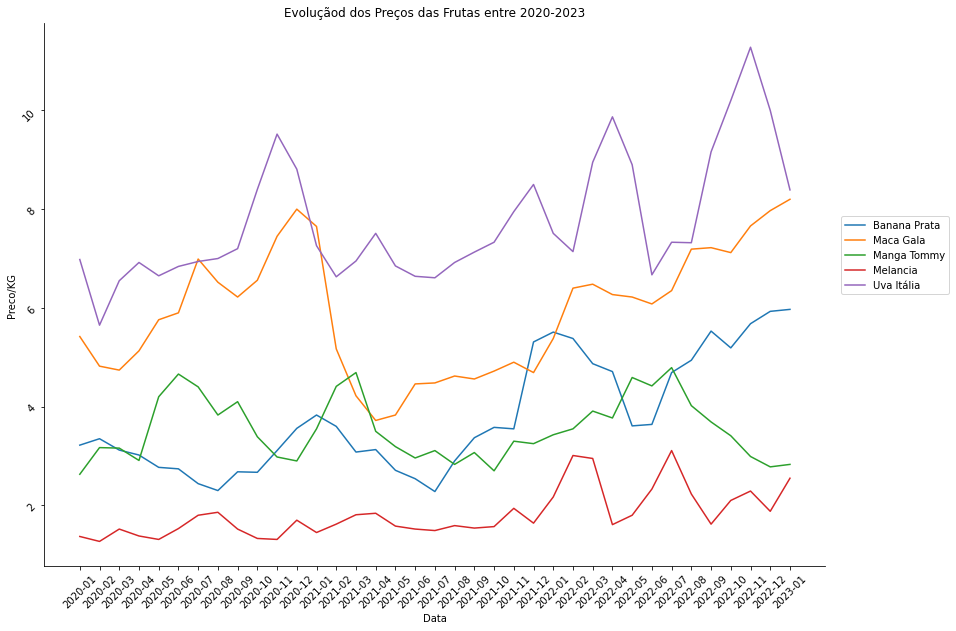

In [14]:
fig, ax = plt.subplots(figsize = (14, 10))

sns.lineplot(x = df['Data'], y = df['Preco/KG'], hue = df['Produto'])

# Formatacao do Grafico
ax.set_title('Evoluçãod dos Preços das Frutas entre 2020-2023')
ax.tick_params(labelrotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc = (1.02, 0.5))
plt.show();

#### Corrigindo pela inflação

In [15]:
from bcb import sgs

In [16]:
class AcumulandoInflacaoDiaria:

    def __init__(self, indice, numero_serie, inicio, fim):
        self.indice = indice
        self.numero_serie = numero_serie
        self.inicio = inicio
        self.fim = fim
        
        self.importando_dados_api()
        
    def importando_dados_api(self):
        
        # Obtendo dados da API
        self.df_inflacao = sgs.get({self.indice : self.numero_serie}, start = self.inicio, end = self.fim)

        # Retirando a coluna do indice para realizar alteracoes
        self.df_inflacao = self.df_inflacao.reset_index()

        # Renomeando colunas
        self.df_inflacao.columns = ['Data', self.indice]

In [17]:
Inflacao_Mensal = AcumulandoInflacaoDiaria(indice = 'ipca', numero_serie = 433, inicio = '2020-01-01', fim = '2023-02-02')
Inflacao_Mensal = Inflacao_Mensal.df_inflacao

In [18]:
df.head(4)

,Produto,Preco/KG,Data
0,Banana Prata,3.22,2020-01
1,Banana Prata,3.35,2020-02
2,Banana Prata,3.12,2020-03
3,Banana Prata,3.02,2020-04


In [19]:
Inflacao_Mensal.head(4)

,Data,ipca
0,2020-01-01,0.21
1,2020-02-01,0.25
2,2020-03-01,0.07
3,2020-04-01,-0.31


In [39]:
def corrigindo_inflacao(df_nao_corrigido, df_inflacao):
    
    # Alterando df_treino
    df_inflacao_copia = df_inflacao.copy()
    df_inflacao_copia['Data'] = df_inflacao_copia['Data'].dt.strftime('%Y-%m')
    
    # Deflacionando para preços de 2019
    df_inflacao_copia['indice_2020'] = 1 * (1 + (df_inflacao_copia['ipca'] / 100))
    df_inflacao_copia.head(1).iloc[0,-1] = 1
    df_inflacao_copia['inflacao_acumulada'] = df_inflacao_copia['indice_2020'].cumprod()
    
    # Unindo os dois dataframes
    df_pronto = pd.merge(df_nao_corrigido, df_inflacao_copia, left_on = 'Data', right_on = 'Data', how = 'inner')
    
    # Colocando a data no indice
    #df_pronto.set_index('Data', inplace = True)
    
    
    # Corrigido pela inflação
    df_pronto['Preco_Corrigido'] = round(df_pronto['Preco/KG'] / df_pronto['inflacao_acumulada'], 2)
    
    # Mantendo colunas relevantes
    df_pronto = df_pronto[['Data', 'Produto', 'Preco/KG', 'Preco_Corrigido']]
    
    return df_pronto

In [40]:
df_corrigido_inflacao = corrigindo_inflacao(df, Inflacao_Mensal)

In [42]:
df_corrigido_inflacao.head(4)

,Data,Produto,Preco/KG,Preco_Corrigido
0,2020-01,Banana Prata,3.22,3.22
1,2020-01,Maca Gala,5.42,5.42
2,2020-01,Manga Tommy,2.63,2.63
3,2020-01,Melancia,1.37,1.37


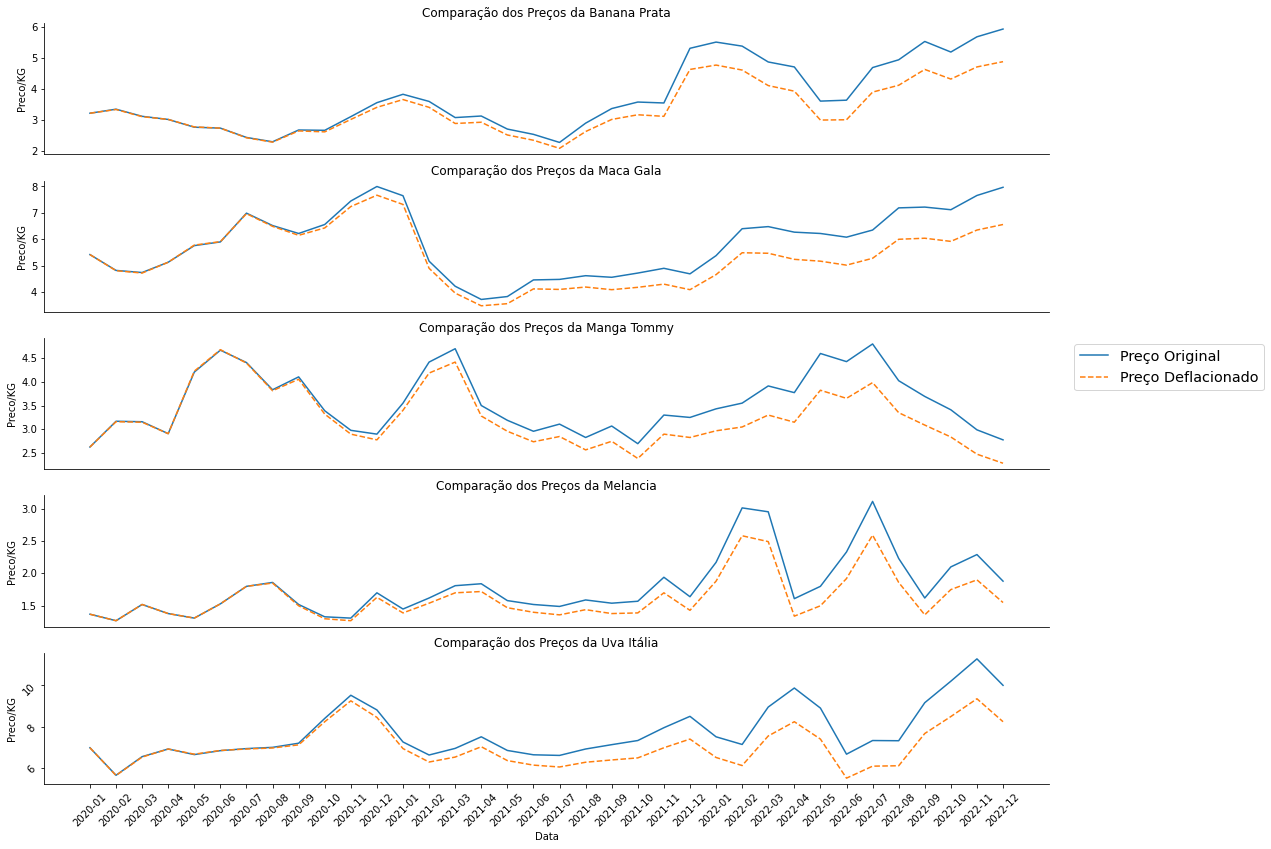

In [43]:
fig, ([ax1, ax2, ax3, ax4, ax5]) = plt.subplots(5, 1, figsize = (18, 14))

axes = [ax1, ax2, ax3, ax4, ax5]

for produto, ax in zip(df_corrigido_inflacao['Produto'].unique(), axes):
    df_plot = df_corrigido_inflacao[df_corrigido_inflacao['Produto'] == produto]
    sns.lineplot(x = df_plot['Data'],
                 y = df_plot['Preco/KG'], ax = ax)
    
    sns.lineplot(x = df_plot['Data'],
                 y = df_plot['Preco_Corrigido'], ax = ax, linestyle = '--')

    # Formtação do Gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f'Comparação dos Preços da {produto}')
    
  
    if ax == ax5:
        ax.tick_params(labelrotation=45)
        ax.legend(['Preço Original', 'Preço Deflacionado'], loc = (1.025, 3), fontsize = 'x-large')
    else:
        ax.set_xticks([])
        ax.set(xlabel = None)

#### Variação nos 3 últimos anos

Aqui avaliamos a variação ocorrida nos preços dessas frutas entre janeiro de 2020 e dezembro de 2022. Consideramos os preços corrigidos pela inflação para avaliar a variação real dos preços.

A manga é a única fruta que está mais barata hoje em relação ao início de 2020. A queda é de quase 13% no preço da fruta.

Todas as frutas restantes tiveram aumento real de preços nesse período. A melancia e a uva tiveram uma variação menor nos preços, de 13,14% e 18,05%, respectivamente. Em seguida aparece a maça gala com cerca de 21% de aumento.

Por fim, a banana prata foi a fruta que registrou maior aumento de preços no período. A alta é de 51,55% passando de R\\$3,22 em janeiro de 2020 para R\\$4,88 em dezembro de 2022.

In [149]:
df_filtrado = df_corrigido_inflacao[(df_corrigido_inflacao['Data'] == '2020-01')\
                                    | (df_corrigido_inflacao['Data'] == '2022-12')]

for produto in df_filtrado['Produto'].unique():
    preco_inicial = df_filtrado[df_filtrado['Produto'] == produto].iloc[0, -1]
    preco_final = df_filtrado[df_filtrado['Produto'] == produto].iloc[1, -1]
    variacao = (preco_final - preco_inicial)
    print(f'Análise da fruta: {produto}!')
    print(f'O preço inicial é de: {preco_inicial}! O preço final é de: {preco_final}!')
    print(f'A variação absoluta de preços é de R${variacao:.2f}!')
    print(f'O que corresponde a uma variação percentual de {(variacao / preco_inicial):.2%}')
    print('-' * 40)

Análise da fruta: Banana Prata!
O preço inicial é de: 3.22! O preço final é de: 4.88!
A variação absoluta de preços é de R$1.66!
O que corresponde a uma variação percentual de 51.55%
----------------------------------------
Análise da fruta: Maca Gala!
O preço inicial é de: 5.42! O preço final é de: 6.56!
A variação absoluta de preços é de R$1.14!
O que corresponde a uma variação percentual de 21.03%
----------------------------------------
Análise da fruta: Manga Tommy!
O preço inicial é de: 2.63! O preço final é de: 2.29!
A variação absoluta de preços é de R$-0.34!
O que corresponde a uma variação percentual de -12.93%
----------------------------------------
Análise da fruta: Melancia!
O preço inicial é de: 1.37! O preço final é de: 1.55!
A variação absoluta de preços é de R$0.18!
O que corresponde a uma variação percentual de 13.14%
----------------------------------------
Análise da fruta: Uva Itália!
O preço inicial é de: 6.98! O preço final é de: 8.24!
A variação absoluta de pre

#### Preço médio em cada ano para as cinco frutas

A banana e a melancia tiveram aumento em seus preços médios anuais de 2021 em relação a 2020 e também de 2022 em relação a 2021.
Já a maça e a uva tiveram redução de 2020 para 2021 e voltaram a aumentar de 2021 para 2022. A melancia se manteve praticamente constante entre 2020 e 2021, porém registrou aumento entre 2021 e 2022.

In [80]:
anos = ['2020', '2021', '2022']

for ano in anos:
    print(f'Resultado para o ano de {ano}')
    print('-' * 40)
    df_filtrado = df_corrigido_inflacao[df_corrigido_inflacao['Data'].str.contains(ano)]
    media = round(df_filtrado.groupby(['Produto'], as_index = False)['Preco_Corrigido'].mean(), 2)
    media['Preco_Corrigido'] = media['Preco_Corrigido'].apply(lambda x: "R${:.2f}".format(x))
    print(media)
    print('\n')

Resultado para o ano de 2020
----------------------------------------
        Produto Preco_Corrigido
0  Banana Prata          R$2.89
1     Maca Gala          R$6.06
2   Manga Tommy          R$3.50
3      Melancia          R$1.48
4    Uva Itália          R$7.21


Resultado para o ano de 2021
----------------------------------------
        Produto Preco_Corrigido
0  Banana Prata          R$3.04
1     Maca Gala          R$4.36
2   Manga Tommy          R$3.10
3      Melancia          R$1.49
4    Uva Itália          R$6.57


Resultado para o ano de 2022
----------------------------------------
        Produto Preco_Corrigido
0  Banana Prata          R$4.17
1     Maca Gala          R$5.60
2   Manga Tommy          R$3.16
3      Melancia          R$1.89
4    Uva Itália          R$7.27


